In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
# Assuming your CSV has columns 'age' and 'income'
# Replace 'your_file.csv' with your actual filename
df = pd.read_csv('LRtry1.csv')


In [8]:
print(df.columns)

Index(['user_id', 'age', 'annual_income'], dtype='object')


In [25]:
#Data Cleaning
df = df.dropna()

In [17]:
X = df['age'].values.reshape(-1, 1)  # Independent variable
y = df['annual_income'].values

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [20]:
# Make predictions
y_pred = model.predict(X_test)


In [21]:
# Calculate metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
error_percentage = (mae / np.mean(y_test)) * 100


In [22]:
# Print results
print(f"Model Performance Metrics:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Error Percentage: {error_percentage:.2f}%")
print(f"\nRegression Equation:")
print(f"Income = ${model.intercept_:,.2f} + ${model.coef_[0]:,.2f} × Age")


Model Performance Metrics:
R² Score: 0.9620
Mean Absolute Error: $1,520.10
Root Mean Squared Error: $2,183.56
Error Percentage: 2.65%

Regression Equation:
Income = $11,074.18 + $1,199.03 × Age


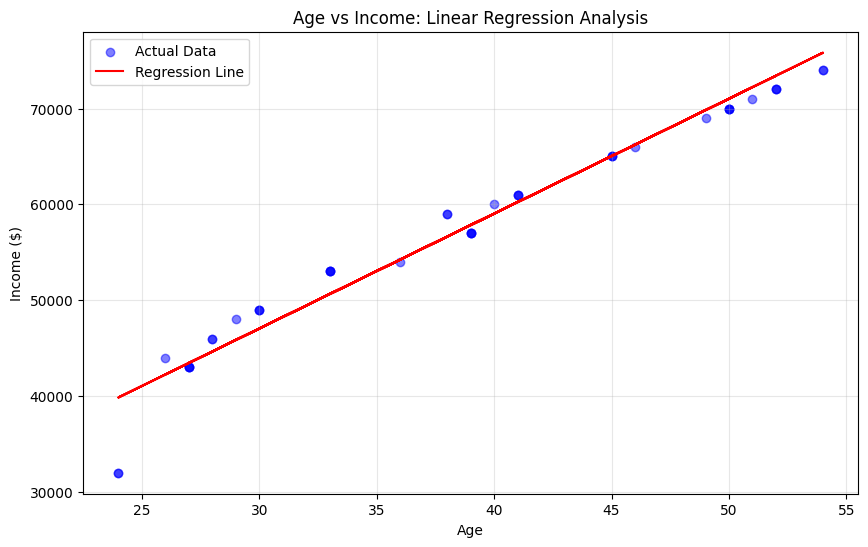

In [23]:
# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.title('Age vs Income: Linear Regression Analysis')
plt.legend()
plt.grid(True, alpha=0.3)

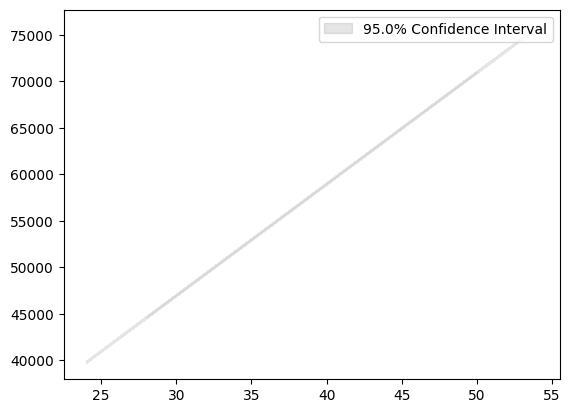

In [24]:
# Add confidence bands
from scipy import stats

confidence = 0.95
n = len(X_test)
mean_x = X_test.mean()
se = np.sqrt(np.sum((y_test - y_pred) ** 2) / (n-2) / np.sum((X_test - mean_x) ** 2))
t = stats.t.ppf((1 + confidence) / 2, n - 2)
ci = t * se * np.sqrt(1 + 1/n + (X_test - mean_x) ** 2 / np.sum((X_test - mean_x) ** 2))

# Reshape y_pred and ci to 1D arrays
y_pred = y_pred.reshape(-1)  # Convert y_pred to 1D
ci = ci.reshape(-1)  # Convert ci to 1D


plt.fill_between(X_test.reshape(-1), y_pred - ci, y_pred + ci, color='gray', alpha=0.2, label=f'{confidence*100}% Confidence Interval')
plt.legend()
plt.show()